<h1> Main.ipynb </h1>
<h2> 1. Import libraries and modules </h2>

In [1]:
import numpy as np
import pandas as pd

from src.Data_Retriever import DataRetriever as DatRet

from src.Optimization.Markowitz_PT import MarkowitzPT as MPT

from src.Optimization.Environment import PortfolioEnvironment as PorEnv
from src.Optimization.RLModelCompilation import RL_Model as RLM
# from src.Optimization.NeuralNet import CustomCNNExtractor 

from src.Result.Menchero_OGA import MencheroOGA as MOGA
from src.Result.IndPortResults import GenerateResult as GR
from src.Result.OverviewResults import ResultConveyor as RC

import time

<h2> 2. Define operating variables </h2>

In [2]:
trading_n = 400
history_usage = 504
n_sectors = 6
n_stocks_per_sector = 4

# For RL algorithm
history_usage_RL = 30
rolling_reward_window = 15

<h2> 3. Define stock dataframe </h2>

In [3]:
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["EQNR.OL", "AKRBP.OL", "SUBC.OL", "BWO.OL",]
ticker_df["Seafood (food)"] = ["ORK.OL", "MOWI.OL", "SALM.OL", "LSG.OL"]
ticker_df["Materials"] = ["NHY.OL", "YAR.OL", "RECSI.OL", "BRG.OL"]  #del this
ticker_df["Technologies"] = ["TEL.OL", "NOD.OL", "ATEA.OL", "BOUV.OL"]
ticker_df["Financial"] = ["STB.OL", "DNB.OL", "GJF.OL", "AKER.OL"]
ticker_df["Shipping"] = ["WAWI.OL", "SNI.OL", "BELCO.OL", "ODF.OL"]
ticker_df

,Petroleum,Seafood (food),Materials,Technologies,Financial,Shipping
0,EQNR.OL,ORK.OL,NHY.OL,TEL.OL,STB.OL,WAWI.OL
1,AKRBP.OL,MOWI.OL,YAR.OL,NOD.OL,DNB.OL,SNI.OL
2,SUBC.OL,SALM.OL,RECSI.OL,ATEA.OL,GJF.OL,BELCO.OL
3,BWO.OL,LSG.OL,BRG.OL,BOUV.OL,AKER.OL,ODF.OL


<h2> 4. Define ESG array </h2>

In [4]:
esg_scores = np.array([36.6, 35.3, 17.9, 18, 
                18, 21.2, 18.7, 29.2, 
                15.7, 25.6, 25.6, 18.4, # Del this
                19.8, 13.8, 18.1, 19, 
                17.2, 14, 17.2, 19.5, 
                19.7, 21.2, 26.8, 19.3])

<h2> 5.-7. (Non-necessary for reproducability) </h2>
<h3>Data retrieval</h3>
<h3>Benchmark optimization (MPT)</h3>
<h3>RL optimization x4</h3>
<br>
All of the data has been generated an stored in csvs. Therefore, I can comment out the code lines below.

In [5]:
# # Retrieve data from yf API: y-m-d
# data = DatRet(ticker_df, "2013-01-01", "2024-12-31", history_usage_RL=history_usage_RL)
# # In function below, set log=True to check for data availability
# data.retrieve_data()

In [6]:
# Generate benchmark weights thorugh MPT using Sharpe ratio
# benchmark = MPT(history_usage, trading_n)
# # IMPORTANT: In order to see  the effect of the weights, algo exclude last observation from optimization
# benchmark.frequency_optimizing()

In [7]:
# objectives = ["Return", "Sharpe", "Sortino", "Sterling", "Return", "Sharpe", "Sortino", "Sterling"]
# esg_compliancy = [True, True, True, True, False, False, False, False]
# # objectives = ["Sharpe"]
# # esg_compliancy = [True]

# for i in range(len(objectives)):
#     reinforcement = RLM(esg_scores, 
#                         objective=objectives[i],
#                         history_usage=history_usage_RL,
#                         rolling_reward_window=rolling_reward_window,
#                         total_timesteps=200,
#                         esg_compliancy=esg_compliancy[i],
#                         )
#     reinforcement.train_model()
#     reinforcement.test_model()

<h2> 8. Attribution analysis </h2>

In [8]:
# paths = ["Return_esg_True", "Sharpe_esg_True",
#          "Sortino_esg_True","Sterling_esg_True",
#          "Return_esg_False", "Sharpe_esg_False",
#          "Sortino_esg_False","Sterling_esg_False",]

# analysis_list = []
# for i in range(len(paths)):
#     att_anal = GR(paths[i],
#             n_sectors, n_stocks_per_sector,
#             trading_n,
#             esg_scores, 
#             ticker_df.columns)
#     att_anal.friple_frequency_analysis()
#     analysis_list.append(att_anal)

<h2> 9. Overview  Result Analysis </h2>

In [9]:
# theta = RC(analysis_list, trading_n)
# theta.convey_results()

<h1> 10. Ad-hoc </h1>

In [10]:
ret = pd.read_csv("Data/Input/StockReturns.csv")
weights = pd.read_csv("Data/RL_weights_Return_esg_false.csv")

train_set = ret.iloc[:int(0.85*len(ret))]
test_set = ret.iloc[int(0.85*len(ret)):]

In [11]:
data = test_set.values

In [ ]:
current_step = 6
history_usage = 5

if current_step < history_usage:
    start_idx = max(0, current_step-  history_usage)
else:
    start_idx = max(0, current_step-  history_usage) +1

end_idx = current_step+1

In [32]:
mydf = pd.DataFrame(data[:, :])
mydf.shape

(904, 24)

In [114]:
maxlen

904

In [158]:
current_step = 904
history_usage = 30

start_idx = 0
end_idx = current_step +2

maxlen = len(mydf)

In [159]:
actual_data = mydf.iloc[start_idx:end_idx,:]
print(actual_data.shape)

(904, 24)


In [160]:
if current_step <= history_usage-2:
    pad = pd.DataFrame(np.array([np.zeros(history_usage - actual_data.shape[0]) for _ in range(24)])) 
    padded_df = pd.concat([pad.T, actual_data]).reset_index(drop=True)
elif current_step >= (maxlen-2):
    print("ja")
    pad = pd.DataFrame(np.array([np.zeros(maxlen - current_step+1) for _ in range(24)])) 
    padded_df = pd.concat([actual_data, pad.T]).reset_index(drop=True)
else:
    padded_df = actual_data
    
return_df = padded_df[-30:]

ja


In [161]:
print(return_df.shape)
return_df

(30, 24)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
875,-0.013581,-6.521739e-03,0.006156,-2.135233e-02,0.000000,0.007886,0.016323,0.013619,0.000574,0.003411,...,-0.011252,0.000000,0.005622,0.003007,7.968082e-03,-0.011844,-2.416355e-02,0.028571,-0.014673,7.168486e-03
876,0.003206,-1.750511e-03,-0.007786,-1.090911e-02,0.000977,0.000489,0.000845,0.005758,-0.009174,0.000309,...,0.008535,-0.013889,-0.003195,-0.014989,2.173919e-02,0.000000,-1.629760e-08,0.006944,-0.003436,-5.338057e-03
877,-0.021621,-3.726436e-02,-0.029708,-2.205884e-02,-0.009756,-0.004888,-0.005068,0.002863,-0.028067,-0.004016,...,-0.008463,-0.002817,-0.010417,-0.013913,-1.837526e-02,-0.018836,-5.714271e-03,0.005172,-0.021839,-1.431132e-02
878,0.015181,1.320581e-02,0.001155,5.263159e-02,0.000985,0.002456,0.006791,0.000951,0.014885,0.001861,...,0.005690,0.000000,0.002429,0.000000,-2.126541e-08,0.005236,-1.915741e-03,0.000000,-0.003525,-1.814829e-03
879,0.010032,2.067418e-02,0.017888,-8.928571e-03,-0.009843,-0.001960,-0.016020,-0.006654,-0.009094,0.017028,...,0.008487,0.018362,0.002423,0.005732,-3.940902e-03,0.015625,-6.717821e-03,-0.005146,-0.004717,-1.090906e-02
880,-0.008058,-1.321012e-03,-0.002834,-3.949154e-08,-0.000994,0.001473,0.000000,0.002871,-0.007993,-0.004566,...,-0.011220,0.005548,-0.003223,0.001315,9.890953e-04,-0.006838,-1.932340e-03,-0.006897,-0.004739,3.218222e-08
881,0.002834,-1.455028e-02,-0.011370,-1.081078e-02,-0.009950,-0.007843,-0.014567,-0.019084,-0.000597,-0.001529,...,-0.012766,-0.011035,-0.009701,0.005254,-2.964382e-03,-0.013769,9.680542e-03,-0.006944,-0.007143,-1.838277e-03
882,-0.003768,-6.263990e-03,-0.010926,3.642976e-03,0.000000,-0.001976,-0.002609,0.001945,-0.018513,-0.003369,...,-0.025862,-0.002789,0.000000,0.001307,3.051466e-08,-0.005236,-2.876301e-03,-0.003497,0.001199,-3.683261e-03
883,0.000756,9.004952e-03,0.000581,5.444702e-03,0.008040,0.017822,0.026155,0.012621,0.004259,0.014751,...,0.036873,0.029371,0.000000,-0.003480,5.946466e-03,0.008772,-2.403846e-02,0.000000,-0.005988,-3.696801e-03
884,0.006803,9.817050e-03,0.011621,-3.610112e-03,-0.001994,0.001459,0.000850,0.001918,0.011815,0.002726,...,-0.032717,-0.002717,-0.003265,0.001309,9.851900e-04,0.001739,1.970420e-03,0.008772,0.004819,1.855241e-03


In [125]:
padded_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000959,-0.009444,-0.019048,-3.770667e-03,-5.112146e-03,-4.079271e-03,-0.007813,-0.010142,-0.018018,-0.016457,...,0.010118,-0.012841,-0.014702,-0.014720,-0.007567,-0.013889,-0.015134,-0.018209,-0.014634,4.975110e-03
1,0.010064,0.001467,-0.002517,1.430734e-01,1.170425e-02,1.199534e-02,0.011811,0.020902,-0.003670,-0.017145,...,-0.028381,0.013008,0.003129,-0.012699,0.002179,0.004225,-0.004137,-0.001546,0.019802,4.950495e-03
2,0.002689,0.006957,0.002163,-1.972642e-08,6.154211e-08,1.908065e-02,0.002918,0.001606,0.017364,-0.008197,...,0.005155,-0.004815,0.000480,-0.002522,0.000543,0.002805,-0.000594,-0.006192,-0.009709,-7.447243e-08
3,-0.025868,-0.042909,-0.060432,-4.569536e-02,1.693041e-03,-1.673757e-02,-0.020854,-0.027655,-0.030256,-0.018224,...,-0.025641,-0.006452,-0.045084,-0.033628,-0.013580,-0.053846,-0.058195,-0.045171,-0.036274,-5.418719e-02
4,-0.012306,-0.014818,-0.016463,2.775771e-03,-3.662010e-03,-1.087150e-07,-0.007925,-0.015664,-0.009067,-0.001511,...,0.026316,0.006494,-0.000502,-0.007326,-0.005507,-0.003696,-0.001261,-0.003263,-0.005087,-1.666653e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,0.006102,0.002802,0.001128,2.173914e-02,6.122433e-03,-2.820528e-03,0.001848,-0.002461,0.000639,-0.002668,...,0.005797,-0.030343,0.000833,0.001776,0.000996,0.003717,0.017005,0.012367,0.007463,4.307115e-02
900,0.011544,0.003726,0.003380,-1.773097e-03,0.000000e+00,7.714392e-04,0.000000,-0.000411,0.006390,0.000669,...,-0.020173,-0.012245,0.000833,0.000443,-0.002985,-0.001852,0.021575,0.012216,-0.002469,1.974863e-02
901,0.013540,0.020882,0.007299,5.328597e-02,8.620674e-03,5.652574e-03,0.004613,0.011929,-0.006032,0.002005,...,0.023529,0.039945,0.013311,0.008418,0.003992,0.012987,0.002640,0.000000,0.000000,1.056342e-02
902,0.001908,0.001364,0.001672,-8.431731e-03,5.027959e-04,1.788488e-03,0.000000,0.000407,0.002874,0.000000,...,0.000000,0.018543,0.001642,-0.002636,0.000994,0.000000,0.000527,0.006897,0.000000,-1.742178e-03


In [ ]:
alfa = np.array([np.dot(test_set.iloc[i+1], weights.iloc[i]) for i in range(len(test_set)-1)])

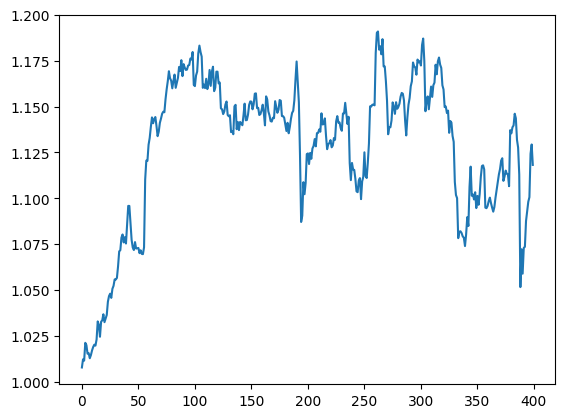

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumprod(alfa[-400:]+1))